# Chapter 3 From Data to Networks

- **Modeling data**
- **Network files**
- **Networks from code**

## Modeling your data

## Reading and writing network files

In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2 ** 32
nprand.seed(seed)
random.seed(seed)
plt.rcParams.update({'figure.figsize': (7.5, 7.5)})

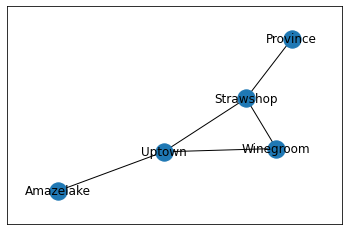

In [2]:
G = nx.read_edgelist('../data/example.edgelist')
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

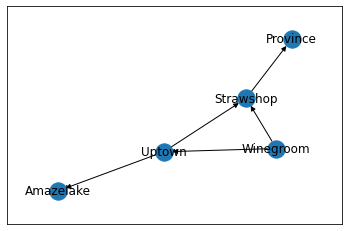

In [3]:
G = nx.read_edgelist('../data/example.edgelist', create_using = nx.DiGraph)
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

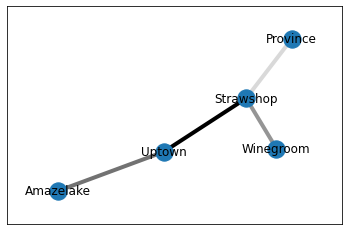

In [4]:
G = nx.read_weighted_edgelist('../data/weighted.edgelist')
weights = [d['weight'] for s, t, d in G.edges(data = True)]
nx.draw_networkx(G, pos, width = 4, edge_color = weights, edge_cmap = plt.cm.Greys)
plt.gca().margins(0.15, 0.15)

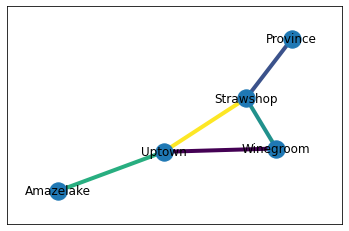

In [5]:
G = nx.read_edgelist('../data/attributes.edgelist', data = [('weight', float), ('color', str)])
colors = [d['weight'] for s, t, d in G.edges(data = True)]
nx.draw_networkx(G, pos, width = 4, edge_color = colors)
plt.gca().margins(0.15, 0.15)

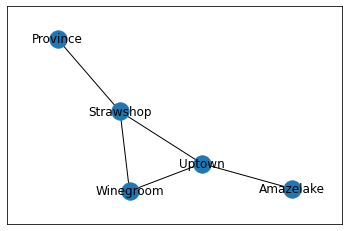

In [6]:
G = nx.read_adjlist('../data/example.adjlist')
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

In [7]:
nx.write_edgelist(G, "../data/out.edgelist")
nx.write_adjlist(G, '../data/out.adjlist')

In [8]:
for v in G.nodes:
    G.nodes[v]['abbreviation'] = v[0]

In [9]:
import sys
nx.write_gexf(G, '../data/out.gefx')

In [10]:
nx.node_link_data(G)

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'abbreviation': 'W', 'id': 'Winegroom'},
  {'abbreviation': 'U', 'id': 'Uptown'},
  {'abbreviation': 'S', 'id': 'Strawshop'},
  {'abbreviation': 'A', 'id': 'Amazelake'},
  {'abbreviation': 'P', 'id': 'Province'}],
 'links': [{'source': 'Winegroom', 'target': 'Uptown'},
  {'source': 'Winegroom', 'target': 'Strawshop'},
  {'source': 'Uptown', 'target': 'Strawshop'},
  {'source': 'Uptown', 'target': 'Amazelake'},
  {'source': 'Strawshop', 'target': 'Province'}]}

## Creating a network with code

In [11]:
stop_words = set([
    'the', 'of', 'and', 'i', 'to', 'my', 'in', 'was', 'that', 'thy',
    'a', 'had', 'my', 'with', 'but', 'he', 'she', 'you', 'your',
    'me', 'not', 'as', 'will', 'from', 'on', 'be', 'it', 'which',
    'for', 'his', 'him', 'chapter', 'at', 'who', 'by', 'have',
    'would', 'is', 'been', 'when', 'they', 'there', 'we', 'are',
    'our', 'if', 'her', 'were', 'than', 'this', 'what', 'so',
    'yet', 'more', 'their', 'them', 'or', 'could', 'an', 'can',
    'said', 'may', 'do', 'these', 'shall', 'how', 'shall', 'asked',
    'before', 'those', 'whom', 'am', 'even', 'its', 'did', 'then',
    'abbey', 'tintern', 'wordsworth', 'letter', 'thee', 'thou', 'oh',
    'into', 'any', 'myself', 'nor', 'himself', 'one', 'all', 'no', 'yes'
    'now', 'upon', 'only', 'might', 'every', 'own', 'such', 'towards',
    'again', 'most', 'ever', 'where', 'after', 'up', 'soon', 'many',
    'also', 'like', 'over', 'us', 'thus', 'has', 'about']
    + [str(x) for x in range(24)])

In [12]:
import re
def co_occurrence_network(text):
    G = nx.Graph()
    sentences = text.split('.')
    for s in sentences:
        clean = re.sub('[^\w\n ]+', '', s).lower()
        clean = re.sub('_+', '', clean).strip()
        words = re.split('\s+', clean)
        for v in words:
            try:
                G.nodes[v]['count'] += 1
            except KeyError:
                G.add_node(v)
                G.nodes[v]['count'] = 1
            for w in words:
                if v == w or v in stop_words or w in stop_words:
                    continue
                if len(v) == 0 or len(w) == 0:
                    continue
                try:
                    G.edges[v, w]['count'] += 1
                except KeyError:
                    G.add_edge(v, w, count=1)
    return G

In [13]:
with open('../data/shelley1818/frankenstein.txt') as f:
    text = f.read()
G = co_occurrence_network(text)

In [14]:
pairs = sorted(
    G.edges(data=True),
    key=lambda e: e[2]['count'],
    reverse = True)
pairs[0:10]

[('man', 'old', {'count': 68}),
 ('country', 'native', {'count': 38}),
 ('first', 'now', {'count': 32}),
 ('death', 'life', {'count': 32}),
 ('human', 'being', {'count': 32}),
 ('natural', 'philosophy', {'count': 32}),
 ('eyes', 'tears', {'count': 30}),
 ('first', 'eyes', {'count': 28}),
 ('some', 'time', {'count': 28}),
 ('night', 'during', {'count': 28})]

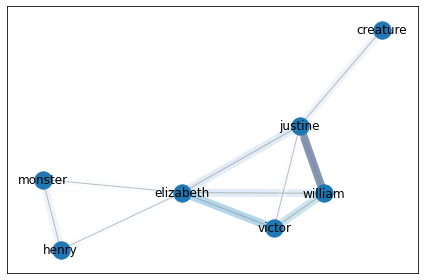

In [15]:
characters = [
    'creature', 'monster', 'victor', 'elizabeth',
    'william', 'henry', 'justine']
G_focus = G.subgraph(characters)

counts = [G_focus.edges[e]['count'] for e in G_focus.edges]


pos = nx.spring_layout(G_focus)

plt.figure()
nx.draw_networkx_nodes(G_focus, pos)

nx.draw_networkx_edges(
    G_focus, pos, width=8,
    edge_color=counts, edge_cmap=plt.cm.Blues, alpha=0.5)
nx.draw_networkx_edges(G_focus, pos, edge_color="#7f7f7f",alpha=0.5)
nx.draw_networkx_labels(G_focus, pos)
plt.tight_layout()